# Getter example

The example of simple Getter class usage and even simpler analysis on recieved data.

## Preparations
Import instabot from sources

In [1]:
import sys
sys.path.append('../../')
from instabot import User, Getter

Login users to be used in instabot. I suggest you to add as many users as you have because all get requests will be parallized between them to distribute the Instagram servers load.  

In [2]:
_ = User("user_for_scrapping1", "password")
_ = User("user_for_scrapping2", "password")
_ = User("user_for_scrapping3", "password")

Init the Getter class without any parameters. It will use all of the available and successfully logged in users to parallize the get requests to Instagram's servers.

In [3]:
get = Getter()

## Usage cases
### Users who posted with geotag
Almost all Getter methods return generators to iterate over medias or users. But some of them such as __get.geo_id__ or __get.user_info__ return single value: the number or the dictionary (json-like).

In [4]:
location_name = "МФТИ"
location_id = get.geo_id(location_name)
print ("The id of %s is %d." % (location_name, location_id))

The id of МФТИ is 1433831.


For example you want to know who posts with specific geotag. You can iterate over medias and take the author's username. 

Get iterator over geo medias

In [5]:
geo_medias = get.geo_medias(location_id, total=10)

In [6]:
print ("Users who post with %s geotag:" % location_name)
for media in geo_medias:
    print (media["user"]["username"])

Users who post with МФТИ geotag:
alissonramos539
kir_ilya
blackgannet
secchiarolli
tinyshortslongarms
igorturin1981
rybkinaliza
g_v_001
mistergahan
a_talyzina


All the values that are in response media's json:

In [7]:
media.keys()

dict_keys(['client_cache_key', 'has_liked', 'photo_of_you', 'comments', 'preview_comments', 'comment_count', 'media_type', 'max_num_visible_preview_comments', 'lat', 'lng', 'code', 'user', 'comment_likes_enabled', 'image_versions2', 'like_count', 'taken_at', 'has_more_comments', 'filter_type', 'device_timestamp', 'original_height', 'caption_is_edited', 'location', 'original_width', 'id', 'caption', 'organic_tracking_token', 'pk', 'usertags'])

### User's mean likes
Another use case: count the mean and std of recieved likes of specific user.

In [8]:
username = "ohld"
user_info = get.user_info(username)
user_id = user_info["pk"]
print ("The id of '%s' is %d." % (username, user_id))

The id of 'ohld' is 352300017.


In [9]:
mean = lambda l: 0 if l == [] else sum(l) * 1. / len(l)

like_counts = [media["like_count"] for media in get.user_feed(user_id, total=20)]
print ("Amount of likes recieved by %s" % username)
print (like_counts)
print ("Mean: %.2f. Total: %d" % (mean(like_counts), sum(like_counts)))

Amount of likes recieved by ohld
[330, 168, 208, 1829, 1516, 532, 343, 307, 347, 390, 523, 391, 750, 1046, 2760, 276, 157, 192, 193, 274]
Mean: 626.60. Total: 12532


### Mean likes of every follower
So let's test the Getter module with __hard task__: calculate mean likes of every follower and make some analysis.

In [10]:
from tqdm import tqdm_notebook # to see the progress of scrapping

mean_likes = {}
for user in tqdm_notebook(get.user_followers(user_id), total=user_info["follower_count"]):
    like_counts = [media['like_count'] for media in get.user_feed(user['pk'], total=5)]
    mean_likes[user["username"]] = mean(like_counts)

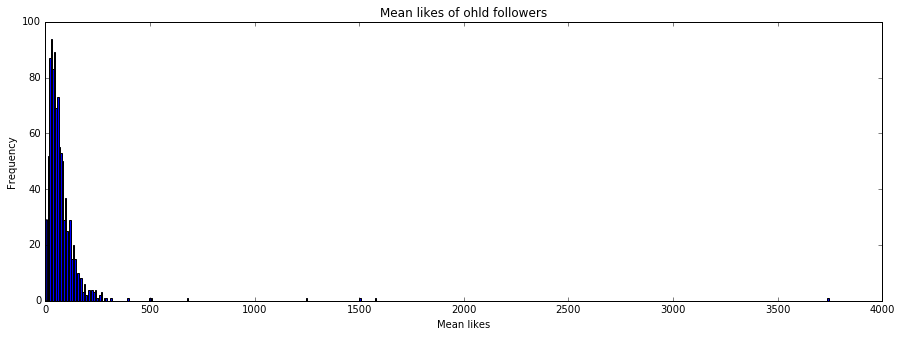

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 5))
plt.hist([i for i in list(mean_likes.values()) if i > 0], bins=500)
plt.title("Mean likes of %s followers" % username)
plt.xlabel("Mean likes")
plt.ylabel("Frequency")
plt.show()

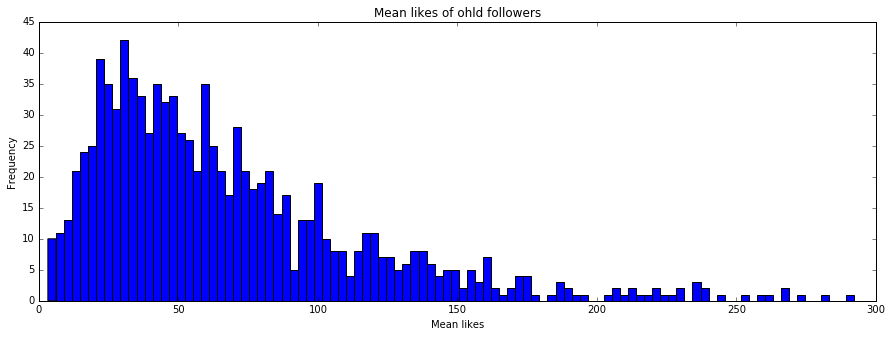

In [12]:
filtered_likes = [item for item in mean_likes.values() if 0 < item < 300]
plt.figure(figsize=(15, 5))
plt.hist(filtered_likes, bins=100)
plt.title("Mean likes of %s followers" % username)
plt.xlabel("Mean likes")
plt.ylabel("Frequency")
plt.show()

Let's take a look at the greatest mean likes owner

In [13]:
print ("%s has the highest value of mean likes in %s followers." % (max(mean_likes, key=mean_likes.get), username))

lord.ach has the highest value of mean likes in ohld followers.
